In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a5972e78-049e-4e68-8091-720a99877198',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11632,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973984e+07,1.973984e+07,False,NaN,1,NaN,NaN,None,2024-08-14T15:18:00.000Z,59284.218873,3.235829e+10,8.2536,0.101243,-0.295913,5.674848,-6.070034,-10.665391,-9.796498,1.170261e+12,55.9092,1.244969e+12,None,2024-08-14T15:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202748e+08,1.202748e+08,True,NaN,2,NaN,NaN,None,2024-08-14T15:17:00.000Z,2645.182203,1.722521e+10,-2.3879,-0.105962,-0.296455,10.547781,-21.554859,-26.049527,-10.396539,3.181487e+11,15.2007,3.181487e+11,None,2024-08-14T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
2,825,Tether USDt,USDT,tether,94112,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.161839e+11,1.180603e+11,True,NaN,3,NaN,NaN,None,2024-08-14T15:17:00.000Z,1.000236,5.538065e+10,6.1519,-0.030222,-0.007152,-0.044297,-0.028671,0.077338,0.002669,1.162112e+11,5.5524,1.180881e+11,None,2024-08-14T15:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 11:19:24.616162
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459364e+08,1.459364e+08,False,NaN,4,NaN,NaN,None,2024-08-14T15:17:00.000Z,521.749371,1.638796e+09,-6.9770,0.690552,0.612794,8.900871,-8.939166,-14.089758,-8.226140,7.614221e+10,3.6380,7.614221e+10,None,2024-08-14T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.668388e+08,5.822623e+08,True,NaN,5,NaN,NaN,None,2024-08-14T15:17:00.000Z,145.582780,2.775624e+09,15.4868,-0.748638,-0.121509,-1.718717,-4.608975,0.529854,-8.082082,6.796369e+10,3.2472,8.476737e+10,None,2024-08-14T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
5,3408,USDC,USDC,usd-coin,21494,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.459802e+10,3.459802e+10,False,NaN,6,NaN,NaN,None,2024-08-14T15:17:00.000Z,0.999833,6.418607e+09,4.2575,-0.021864,-0.021372,-0.077393,-0.025785,-0.021462,-0.013981,3.459224e+10,1.6528,3.459224e+10,None,2024-08-14T15:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 11:19:24.616162
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-14T15:18:00.000Z,0.574296,1.255193e+09,-0.0931,1.084884,0.173805,14.916114,8.793497,18.664551,11.052272,3.222550e+10,1.5397,5.742957e+10,None,2024-08-14T15:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
7,11419,Toncoin,TON,toncoin,504,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518583e+09,5.110464e+09,True,NaN,8,3.414167e+09,2.360146e+10,None,2024-08-14T15:17:00.000Z,6.912803,6.392127e+08,87.4577,0.226080,9.694535,25.434096,-6.798779,-13.984013,3.298306,1.741047e+10,0.8318,3.532763e+10,None,2024-08-14T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:19:24.616162
8,74,Dogecoin,DOGE,dogecoin,1035,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [9]:

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a5972e78-049e-4e68-8091-720a99877198',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\Users\anisr\API.csv'):
        df.to_csv(r'C:\Users\anisr\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\anisr\API.csv', mode='a', header=False)


In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [47]:
df72 = pd.read_csv(r'C:\Users\anisr\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11632,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19739831.00000,19739831.00000,False,NaN,1,NaN,NaN,NaN,2024-08-14T14:31:00.000Z,59505.17937,31898699909.49253,2.15150,-2.29339,0.31041,5.68008,-5.36271,-10.08317,-9.79966,1174622184311.46582,56.01930,1249608766688.06006,NaN,2024-08-14T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 10:31:55.622020
1,1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120274778.26400,120274778.26400,True,NaN,2,NaN,NaN,NaN,2024-08-14T14:30:00.000Z,2662.51138,17042786910.26239,-7.31250,-2.13993,0.19488,10.42235,-20.57521,-25.15341,-10.14886,320232965256.23401,15.27390,320232965256.22998,NaN,2024-08-14T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 10:31:55.622020
2,2,825,Tether USDt,USDT,tether,94111,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,116183859406.61864,118060317102.42429,True,NaN,3,NaN,NaN,NaN,2024-08-14T14:30:00.000Z,1.00054,54838400923.75050,1.53260,0.01942,0.01196,-0.00081,0.01065,0.10671,0.03066,116246330847.59608,5.54450,118123797504.69000,NaN,2024-08-14T14:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 10:31:55.622020
3,3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936366.67995,145936366.67995,False,NaN,4,NaN,NaN,NaN,2024-08-14T14:30:00.000Z,520.73249,1622189036.16085,-9.23430,-1.25251,0.45630,8.57149,-8.63999,-13.95286,-9.28150,75993808072.70934,3.62460,75993808072.71001,NaN,2024-08-14T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 10:31:55.622020
4,4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466838955.24426,582262494.85808,True,NaN,5,NaN,NaN,NaN,2024-08-14T14:30:00.000Z,147.06046,2734805219.91581,7.92790,-1.85698,0.33952,-1.45108,-3.31295,1.66697,-8.86863,68653551117.28095,3.27450,85627789852.07001,NaN,2024-08-14T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 10:31:55.622020
5,5,3408,USDC,USDC,usd-coin,21493,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34567996682.83553,34567996682.83553,False,NaN,6,NaN,NaN,NaN,2024-08-14T14:30:00.000Z,1.00016,6294817258.27207,-1.51770,0.03033,0.01261,-0.01533,0.00853,0.01881,0.02014,34573541902.42186,1.64900,34573541902.42000,NaN,2024-08-14T14:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 10:31:55.622020
6,6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,NaN,2024-08-14T14:31:00.000Z,0.57204,1263521677.31211,-0.51200,-1.12302,-0.04070,14.24176,8.39547,18.47370,11.06348,32098976187.69235,1.53100,57204087818.27000,NaN,2024-08-14T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 10:31:55.622020
7,7,11419,Toncoin,TON,toncoin,504,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2518545611.84208,5110426498.50473,True,NaN,8,3414166606.00000,23636178822.63603,NaN,2024-08-14T14:30:00.000Z,6.92297,606115822.67866,71.56190,-1.75366,9.20308,23.61358,-6.73082,-14.73175,4.51493,17435820018.22929,0.83150,35379338069.30000,NaN,202

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11632,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19739840.00000,19739840.00000,False,NaN,1,NaN,NaN,None,2024-08-14T15:20:00.000Z,59379.94382,32378907362.06588,8.42760,0.15721,-0.15077,5.92464,-5.91536,-10.57330,-9.66188,1172150590265.98413,56.01410,1246978820273.39990,None,2024-08-14T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120274778.26400,120274778.26400,True,NaN,2,NaN,NaN,None,2024-08-14T15:19:00.000Z,2646.75587,17223873892.18635,-2.30380,-0.05503,-0.10952,10.77468,-21.48774,-26.16456,-10.34631,318337975615.25409,15.20970,318337975615.25000,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
2,825,Tether USDt,USDT,tether,94112,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116183859406.61864,118060317102.42427,True,NaN,3,NaN,NaN,None,2024-08-14T15:19:00.000Z,1.00030,55383126126.02941,6.24210,-0.00331,0.00609,-0.04017,-0.05164,0.08721,0.00139,116218413935.48991,5.55270,118095429713.22000,None,2024-08-14T15:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 11:22:37.528765
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936365.13570,145936365.13570,False,NaN,4,NaN,NaN,None,2024-08-14T15:19:00.000Z,522.02138,1636283017.27120,-7.06830,0.71547,0.74590,9.20074,-8.93996,-14.13911,-8.16296,76181902866.81616,3.63990,76181902866.82001,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466838782.83149,582262337.49861,True,NaN,5,NaN,NaN,None,2024-08-14T15:19:00.000Z,145.75662,2777643367.76279,15.80870,-0.82607,0.14064,-1.22703,-4.60692,0.41731,-8.27753,68044845400.03455,3.25110,84868593172.67999,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
5,3408,USDC,USDC,usd-coin,21494,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34598018728.31804,34598018728.31804,False,NaN,6,NaN,NaN,None,2024-08-14T15:19:00.000Z,0.99997,6418815812.35077,4.22430,-0.00616,0.00907,-0.01173,-0.04312,-0.00845,-0.01016,34597140508.30424,1.65300,34597140508.30000,None,2024-08-14T15:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 11:22:37.528765
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-14T15:20:00.000Z,0.57409,1255862874.33862,0.03120,0.79844,0.11805,15.06460,8.71940,18.44806,11.05223,32214000867.29519,1.53910,57409075099.94000,None,2024-08-14T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
7,11419,Toncoin,TON,toncoin,504,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518583282.92439,5110464209.75991,True,NaN,8,3414166606.00000,23588082900.85003,None,2024-08-14T15:19:00.000Z,6.90888,639309279.92061,87.54770,0.00232,9.74166,25.75735,-6.86323,-14.05928,3.11841,17400601120.61077,0.83150,35307607200.48000,None,2024-08-14T1

In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11632,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19739840.00000,19739840.00000,False,NaN,1,NaN,NaN,None,2024-08-14T15:20:00.000Z,59379.94382,32378907362.06588,8.42760,0.15721,-0.15077,5.92464,-5.91536,-10.57330,-9.66188,1172150590265.98413,56.01410,1246978820273.39990,None,2024-08-14T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120274778.26400,120274778.26400,True,NaN,2,NaN,NaN,None,2024-08-14T15:19:00.000Z,2646.75587,17223873892.18635,-2.30380,-0.05503,-0.10952,10.77468,-21.48774,-26.16456,-10.34631,318337975615.25409,15.20970,318337975615.25000,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
2,825,Tether USDt,USDT,tether,94112,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116183859406.61864,118060317102.42427,True,NaN,3,NaN,NaN,None,2024-08-14T15:19:00.000Z,1.00030,55383126126.02941,6.24210,-0.00331,0.00609,-0.04017,-0.05164,0.08721,0.00139,116218413935.48991,5.55270,118095429713.22000,None,2024-08-14T15:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 11:22:37.528765
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936365.13570,145936365.13570,False,NaN,4,NaN,NaN,None,2024-08-14T15:19:00.000Z,522.02138,1636283017.27120,-7.06830,0.71547,0.74590,9.20074,-8.93996,-14.13911,-8.16296,76181902866.81616,3.63990,76181902866.82001,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466838782.83149,582262337.49861,True,NaN,5,NaN,NaN,None,2024-08-14T15:19:00.000Z,145.75662,2777643367.76279,15.80870,-0.82607,0.14064,-1.22703,-4.60692,0.41731,-8.27753,68044845400.03455,3.25110,84868593172.67999,None,2024-08-14T15:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
5,3408,USDC,USDC,usd-coin,21494,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34598018728.31804,34598018728.31804,False,NaN,6,NaN,NaN,None,2024-08-14T15:19:00.000Z,0.99997,6418815812.35077,4.22430,-0.00616,0.00907,-0.01173,-0.04312,-0.00845,-0.01016,34597140508.30424,1.65300,34597140508.30000,None,2024-08-14T15:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 11:22:37.528765
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-14T15:20:00.000Z,0.57409,1255862874.33862,0.03120,0.79844,0.11805,15.06460,8.71940,18.44806,11.05223,32214000867.29519,1.53910,57409075099.94000,None,2024-08-14T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 11:22:37.528765
7,11419,Toncoin,TON,toncoin,504,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518583282.92439,5110464209.75991,True,NaN,8,3414166606.00000,23588082900.85003,None,2024-08-14T15:19:00.000Z,6.90888,639309279.92061,87.54770,0.00232,9.74166,25.75735,-6.86323,-14.05928,3.11841,17400601120.61077,0.83150,35307607200.48000,None,2024-08-14T1

In [55]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.15721,-0.15077,5.92464,-5.91536,-10.57330,-9.66188
Ethereum,-0.05503,-0.10952,10.77468,-21.48774,-26.16456,-10.34631
Tether USDt,-0.00331,0.00609,-0.04017,-0.05164,0.08721,0.00139
BNB,0.71547,0.74590,9.20074,-8.93996,-14.13911,-8.16296
Solana,-0.82607,0.14064,-1.22703,-4.60692,0.41731,-8.27753
USDC,-0.00616,0.00907,-0.01173,-0.04312,-0.00845,-0.01016
XRP,0.79844,0.11805,15.06460,8.71940,18.44806,11.05223
Toncoin,0.00232,9.74166,25.75735,-6.86323,-14.05928,3.11841
Dogecoin,0.17661,-2.49481,4.92670,-13.53681,-25.16094,-32.05034


In [57]:
df4=df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.15721
              quote.USD.percent_change_24h    -0.15077
              quote.USD.percent_change_7d      5.92464
              quote.USD.percent_change_30d    -5.91536
              quote.USD.percent_change_60d   -10.57330
              quote.USD.percent_change_90d    -9.66188
Ethereum      quote.USD.percent_change_1h     -0.05503
              quote.USD.percent_change_24h    -0.10952
              quote.USD.percent_change_7d     10.77468
              quote.USD.percent_change_30d   -21.48774
              quote.USD.percent_change_60d   -26.16456
              quote.USD.percent_change_90d   -10.34631
Tether USDt   quote.USD.percent_change_1h     -0.00331
              quote.USD.percent_change_24h     0.00609
              quote.USD.percent_change_7d     -0.04017
              quote.USD.percent_change_30d    -0.05164
              quote.USD.percent_change_60d     0.08721
              quote.US

In [59]:
type(df4)

pandas.core.series.Series

In [61]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.15721
             quote.USD.percent_change_24h  -0.15077
             quote.USD.percent_change_7d    5.92464
             quote.USD.percent_change_30d  -5.91536
             quote.USD.percent_change_60d -10.57330
             quote.USD.percent_change_90d  -9.66188
Ethereum     quote.USD.percent_change_1h   -0.05503
             quote.USD.percent_change_24h  -0.10952
             quote.USD.percent_change_7d   10.77468
             quote.USD.percent_change_30d -21.48774
             quote.USD.percent_change_60d -26.16456
             quote.USD.percent_change_90d -10.34631
Tether USDt  quote.USD.percent_change_1h   -0.00331
             quote.USD.percent_change_24h   0.00609
             quote.USD.percent_change_7d   -0.04017
             quote.USD.percent_change_30d  -0.05164
             quote.USD.percent_change_60d   0.08721
             quote.USD.percent_change_90d   0.00139
BNB          quote.USD.percent_change_1h    0.71547
             quote.USD.percent_change_24h   0.74590
             quote.USD.percent_change_7d    9.20074
             quote.USD.percent_change_30d  -8.93996
             quote.USD.percent_change_60d -14.13911
             quote.USD.percent_change_90d  -8.16296
Solana       quote.USD.percent_change_1h   -0.82607
             quote.USD.percent_change_24h   0.14064
             quote.USD.percent_change_7d   -1.22703
             quote.USD.percent_change_30d  -4.60692
             quote.USD.percent_change_60d   0.41731
             quote.USD.percent_change_90d  -8.27753
USDC         quote.USD.percent_change_1h   -0.00616
             quote.USD.percent_change_24h   0.00907
             quote.USD.percent_change_7d   -0.01173
             quote.USD.percent_change_30d  -0.04312
             quote.USD.percent_change_60d  -0.00845
             quote.USD.percent_change_90d  -0.01016
XRP          quote.USD.percent_change_1h    0.79844
             quote.USD.percent_change_24h   0.11805
             quote.USD.percent_change_7d   15.06460
             quote.USD.percent_change_30d   8.71940
             quote.USD.percent_change_60d  18.44806
             quote.USD.percent_change_90d  11.05223
Toncoin      quote.USD.percent_change_1h    0.00232
             quote.USD.percent_change_24h   9.74166
             quote.USD.percent_change_7d   25.75735
             quote.USD.percent_change_30d  -6.86323
             quote.USD.percent_change_60d -14.05928
             quote.USD.percent_change_90d   3.11841
Dogecoin     quote.USD.percent_change_1h    0.17661
             quote.USD.percent_change_24h  -2.49481
             quote.USD.percent_change_7d    4.92670
             quote.USD.percent_change_30d -13.53681
             quote.USD.percent_change_60d -25.16094
             quote.USD.percent_change_90d -32.05034
Cardano      quote.USD.percent_change_1h    0.67201
             quote.USD.percent_change_24h  -0.22947
             quote.USD.percent_change_7d    3.57097
             quote.USD.percent_change_30d -22.94033
             quote.USD.percent_change_60d -18.50120
             quote.USD.percent_change_90d -25.60757
TRON         quote.USD.percent_change_1h    0.27027
             quote.USD.percent_change_24h   1.99995
             quote.USD.percent_change_7d    4.81231
             quote.USD.percent_change_30d  -5.71407
             quote.USD.percent_change_60d  13.09326
             quote.USD.percent_change_90d   4.01798
Avalanche    quote.USD.percent_change_1h    0.86710
             quote.USD.percent_change_24h   0.96424
             quote.USD.percent_change_7d    3.97323
             quote.USD.percent_change_30d -21.72139
             quote.USD.percent_change_60d -30.53134
             quote.USD.percent_change_90d -37.85177
Shiba Inu    quote.USD.percent_change_1h    0.30034
             quote.USD.percent_change_24h  -1.24403
             quote.USD.percent_change_7d    3.14999
             quote.USD.percent_change_30d

In [63]:
df5.count()

values    90
dtype: int64

In [65]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15721
1,Bitcoin,quote.USD.percent_change_24h,-0.15077
2,Bitcoin,quote.USD.percent_change_7d,5.92464
3,Bitcoin,quote.USD.percent_change_30d,-5.91536
4,Bitcoin,quote.USD.percent_change_60d,-10.57330
5,Bitcoin,quote.USD.percent_change_90d,-9.66188
6,Ethereum,quote.USD.percent_change_1h,-0.05503
7,Ethereum,quote.USD.percent_change_24h,-0.10952
8,Ethereum,quote.USD.percent_change_7d,10.77468
9,Ethereum,quote.USD.percent_change_30d,-21.48774


In [67]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15721
1,Bitcoin,quote.USD.percent_change_24h,-0.15077
2,Bitcoin,quote.USD.percent_change_7d,5.92464
3,Bitcoin,quote.USD.percent_change_30d,-5.91536
4,Bitcoin,quote.USD.percent_change_60d,-10.57330
5,Bitcoin,quote.USD.percent_change_90d,-9.66188
6,Ethereum,quote.USD.percent_change_1h,-0.05503
7,Ethereum,quote.USD.percent_change_24h,-0.10952
8,Ethereum,quote.USD.percent_change_7d,10.77468
9,Ethereum,quote.USD.percent_change_30d,-21.48774


In [69]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.15721
1,Bitcoin,24h,-0.15077
2,Bitcoin,7d,5.92464
3,Bitcoin,30d,-5.91536
4,Bitcoin,60d,-10.57330
5,Bitcoin,90d,-9.66188
6,Ethereum,1h,-0.05503
7,Ethereum,24h,-0.10952
8,Ethereum,7d,10.77468
9,Ethereum,30d,-21.48774


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

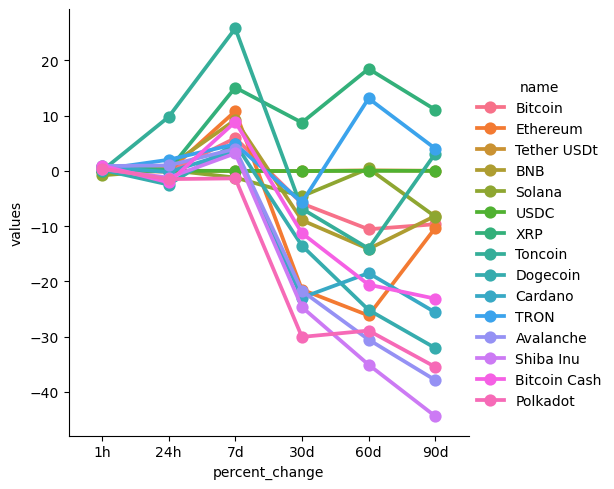

In [73]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [75]:
df10 = df72[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Solana'")
df10

,name,quote.USD.price,Timestamp
4,Solana,147.06046,2024-08-14 10:31:55.622020
19,Solana,147.06046,2024-08-14 10:31:55.622020
34,Solana,147.09328,2024-08-14 10:32:56.171668
49,Solana,147.09328,2024-08-14 10:32:56.171668
64,Solana,147.01449,2024-08-14 10:33:56.526041
79,Solana,147.01449,2024-08-14 10:33:56.526041
94,Solana,145.58278,2024-08-14 11:19:36.130863
109,Solana,145.58278,2024-08-14 11:19:36.130863
124,Solana,145.62095,2024-08-14 11:20:36.692838
139,Solana,145.62095,2024-08-14 11:20:36.692838


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

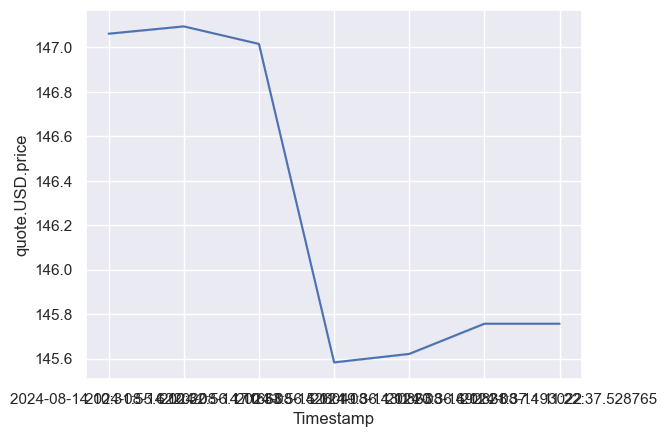

In [77]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)